<a href="https://colab.research.google.com/github/robitussin/CCINSYSL_EXERCISES/blob/main/exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [213]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [214]:
faces = fetch_olivetti_faces()

In [215]:
faces.data.shape

(400, 4096)

In [216]:
faces.images.shape

(400, 64, 64)

In [217]:
faces.target.shape

(400,)

In [218]:
faces.target[200]

20

#### 1. Plot the image of index zero

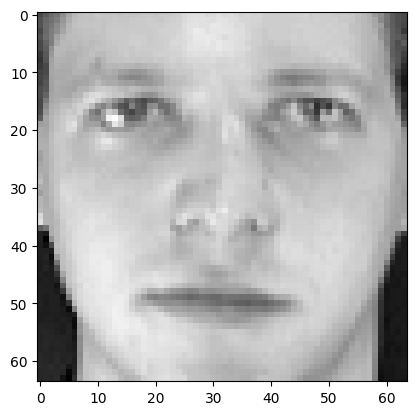

In [219]:
# put your answer here
plt.imshow(faces.images[0], cmap=plt.cm.gray)

#### 2. Create a subplot of 10 images in a 3x3 configuration

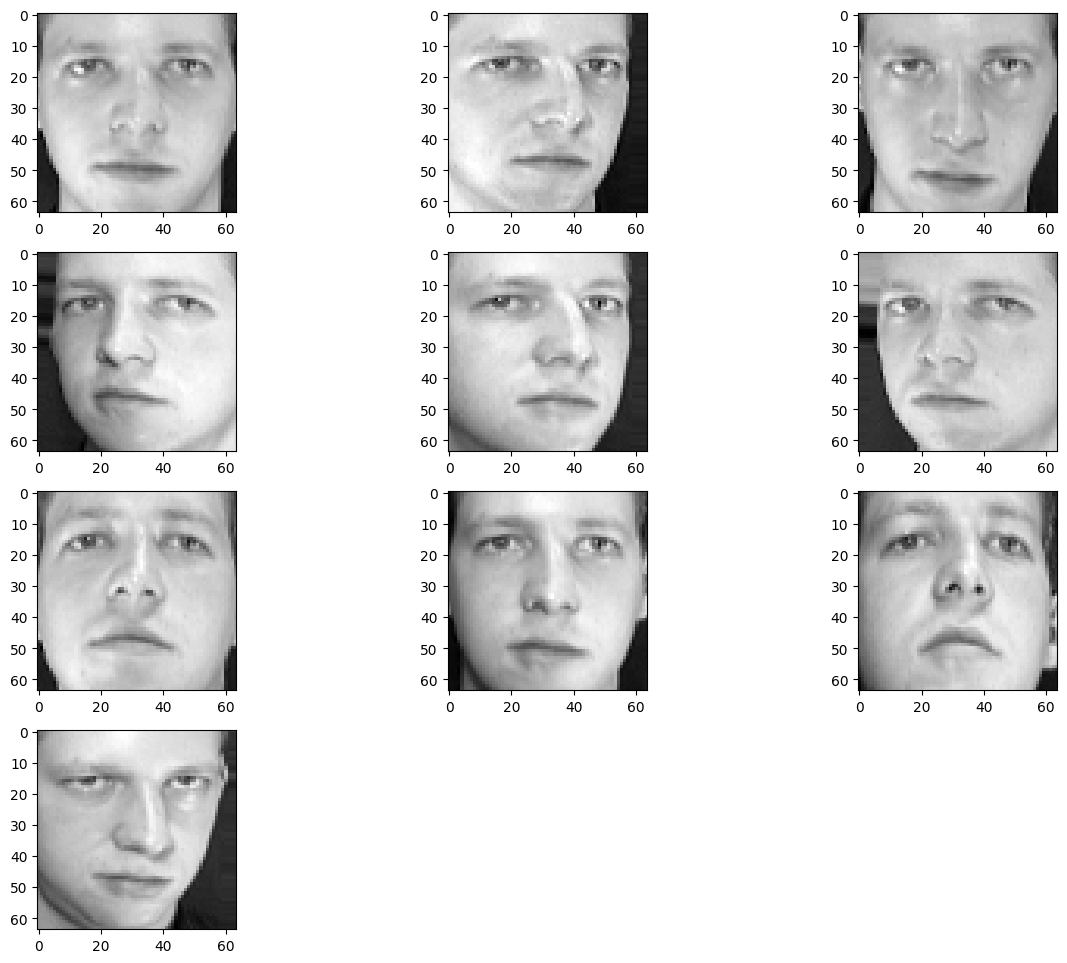

In [220]:
# put your answer here
plt.figure(figsize=(15,15))
for index, (data, image) in enumerate(zip(faces.data[0:10], faces.images[0:10])):
    plt.subplot(5, 3, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)

#### 3. Split the data into a training and test set

In [221]:
# put your answer here
train_image, test_image, train_data, test_data = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=1000)

print(train_image)
print(test_image)
print(train_data)
print(test_data)

[[0.24793388 0.38842976 0.3966942  ... 0.1694215  0.17355372 0.16528925]
 [0.25619835 0.2231405  0.28099173 ... 0.3181818  0.30165288 0.28512397]
 [0.76033056 0.78099173 0.7644628  ... 0.16528925 0.16528925 0.16528925]
 ...
 [0.42975205 0.5041322  0.6322314  ... 0.20661157 0.23140496 0.21487603]
 [0.19421488 0.2231405  0.3140496  ... 0.13636364 0.1694215  0.16528925]
 [0.21487603 0.28512397 0.42975205 ... 0.24380165 0.38429752 0.3305785 ]]
[[0.4090909  0.59090906 0.6570248  ... 0.2520661  0.2768595  0.28512397]
 [0.5        0.54545456 0.58264464 ... 0.17768595 0.17355372 0.17355372]
 [0.4338843  0.46280992 0.5        ... 0.23140496 0.2231405  0.2107438 ]
 ...
 [0.59090906 0.74793386 0.8264463  ... 0.30165288 0.30578512 0.3181818 ]
 [0.2107438  0.20661157 0.19421488 ... 0.54545456 0.35950413 0.21900827]
 [0.45454547 0.49586776 0.54545456 ... 0.38016528 0.40082645 0.38429752]]
[18  6 25 20 23 36 38 37  9  2 12 27 28 36 36  7 18 15 31 24 35 24 26 38
 23  8 23  5 18 29 18 27 30 11 25  6 17

#### 4. Create a new instance of the LogisticRegression class

In [222]:
# put your answer here
logReg = LogisticRegression()

#### 5. Train the model using the training set using the `fit()` function

In [223]:
# put your answer here
logReg.fit(train_image, train_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [224]:
# put your answer here
logReg.predict(test_image[0].reshape(1,-1))

array([22])

#### 7. Get the accuracy using the `score()` function

In [225]:
# put your answer here
score = logReg.score(test_image, test_data)
print('Accuracy Score: ',score)

Accuracy Score:  0.9827586206896551


#### 8. Collect all the misclassified images and create a plot for visualization

In [226]:
# put your answer here
predictions = logReg.predict(test_image)
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_data, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

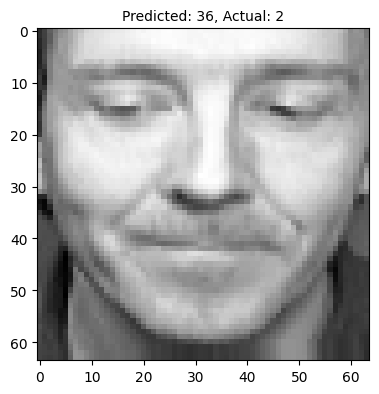

In [227]:
plt.figure(figsize=(25,25))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(5, 4, plotIndex + 1)
    plt.imshow(np.reshape(test_image[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_data[badIndex]), fontsize = 10)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [228]:
# put your answer here
clf = SGDClassifier(loss="log_loss", penalty="l2")

#### 10. Train the model using the training set using the `fit()` function

In [229]:
# put your answer here
clf.fit(train_image, train_data)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [230]:
# put your answer here
y_pred = logReg.predict(test_image)

#### 12. Get the accuracy using the `score()` function

In [231]:
# put your answer here
score = clf.score(test_image, test_data)
print('Accuracy Score: ',score)

Accuracy Score:  0.9310344827586207


#### 13. Find the best number of iterations to get the best accuracy

0.9137931034482759
0.9137931034482759
0.9310344827586207
0.8793103448275862
0.9482758620689655
0.9482758620689655
0.9137931034482759


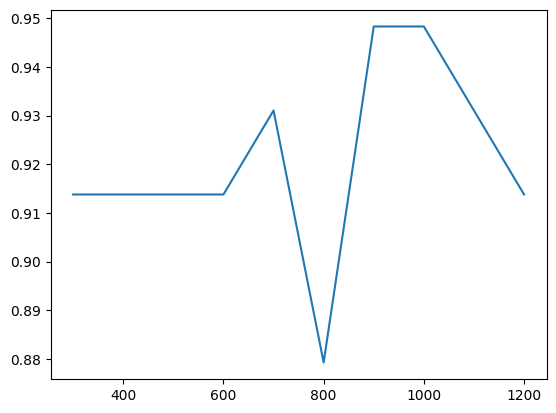

In [232]:
num_iter = [300,600,700,800,900,1000,1200]
scores = []

for i in num_iter:
  clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=i)
  clf.fit(train_image, train_data)
  y_pred = logReg.predict(test_image)
  score = clf.score(test_image, test_data)
  scores.append(score)
  print(score)

plt.plot(num_iter,scores)